In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [22]:
a = [[1,2,3]]
np.repeat(a,3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [23]:
df = pd.read_csv('wandb_export_sp_shot.csv')
df['n_shot'] = np.repeat([list(reversed(range(1, 11)))], 3) 
df

,method,split,acc_mean,acc_std,n_shot
0,relationnet,train,92.888889,9.130062,10
1,relationnet,val,57.777778,4.399776,10
2,relationnet,test,52.444444,2.266231,10
3,relationnet,train,93.333333,1.885618,9
4,relationnet,val,64.444444,7.410370,9
5,relationnet,test,48.444444,6.651835,9
6,relationnet,train,94.222222,1.662959,8
7,relationnet,val,58.666667,9.797959,8
8,relationnet,test,44.888889,10.740485,8
9,relationnet,train,77.777778,9.878271,7


In [24]:
def plot_ana(df, func = "shot"):
    df_val = df[df['split']=='val']
    df_test = df[df['split']=='test']
    df_train = df[df['split']=='train']

    plt.figure(figsize=(5, 3))
    sns.set(style="whitegrid")  
    sns.set_palette("pastel")   

    x_name = f'n_{func}'
    # sns.lineplot(x=x_name, y='acc_mean', data=df_train, estimator='mean', label = "train")
    sns.lineplot(x=x_name, y='acc_mean', data=df_val, estimator='mean', label = "val")
    sns.lineplot(x=x_name, y='acc_mean', data=df_test, estimator='mean', label = "test")
    interval_scale = 1.96/np.sqrt(3)
    # plt.fill_between(df_train[x_name], df_train['acc_mean'] - interval_scale*df_train['acc_std'], df_train['acc_mean'] + interval_scale*df_train['acc_std'], alpha=0.3)
    plt.fill_between(df_val[x_name], df_val['acc_mean'] - interval_scale*df_val['acc_std'], df_val['acc_mean'] + interval_scale*df_val['acc_std'], alpha=0.3)
    plt.fill_between(df_test[x_name], df_test['acc_mean'] - interval_scale*df_test['acc_std'], df_test['acc_mean'] + interval_scale*df_test['acc_std'], alpha=0.3)

    plt.title(f'Analysis of accuracy with n_{func}s on swissprot')
    plt.xlabel(x_name)
    plt.ylabel('accuracy')
    plt.legend(loc = 'best')
    plt.tight_layout() 
    plt.savefig(f'sp_{func}s.png')
    plt.show()

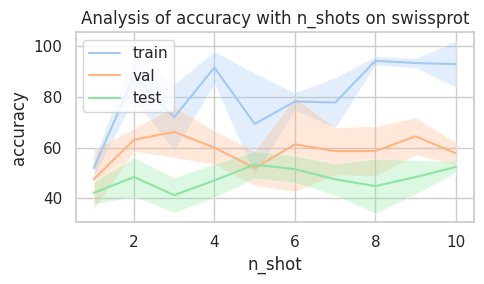

In [25]:
plot_ana(df)

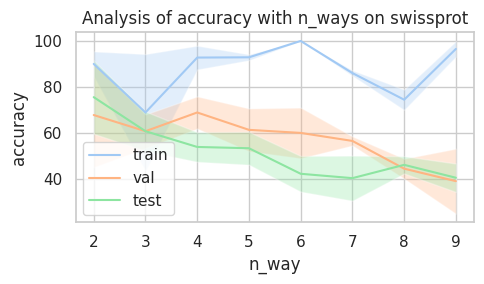

In [26]:
df_way = pd.read_csv('wandb_export_sp_way.csv')
df_way['n_way'] = np.repeat([list(reversed(range(2, 10)))], 3) 
plot_ana(df_way, 'way')